# <center>Лабораторна робота №4. <br> Візуальний аналіз даних про пасажирів Титаніку</center>

**Заповніть код в клітинках замість "Ваш код тут"**

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

**Зчитуємо навчальну вибірку.**

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google collab, а не на PC, можна отримати шляхом монтування google drive

In [2]:
"""
#Uncomment next sections if use in google collab
!pip install google-colab
!pip install pydrive
"""


In [3]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""


In [4]:
"""
downloaded = drive.CreateFile({'id':"1Ek1eJp4jTMvq0t62pIacmjFqD57amcXF"})
downloaded.GetContentFile('titanic_train.csv')
"""

In [5]:
#train_df = pd.read_csv("titanic_train.csv", index_col='PassengerId')

train_df = pd.read_csv('titanic_train.csv', index_col='PassengerId' )

In [6]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Hunt, Mr. George Henry",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Відкинемо ознаку `Cabin`, а потім – всі рядки, де є пропуски.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Побудуйте попарні залежності ознак `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas чи `pairplot` Seaborn).**

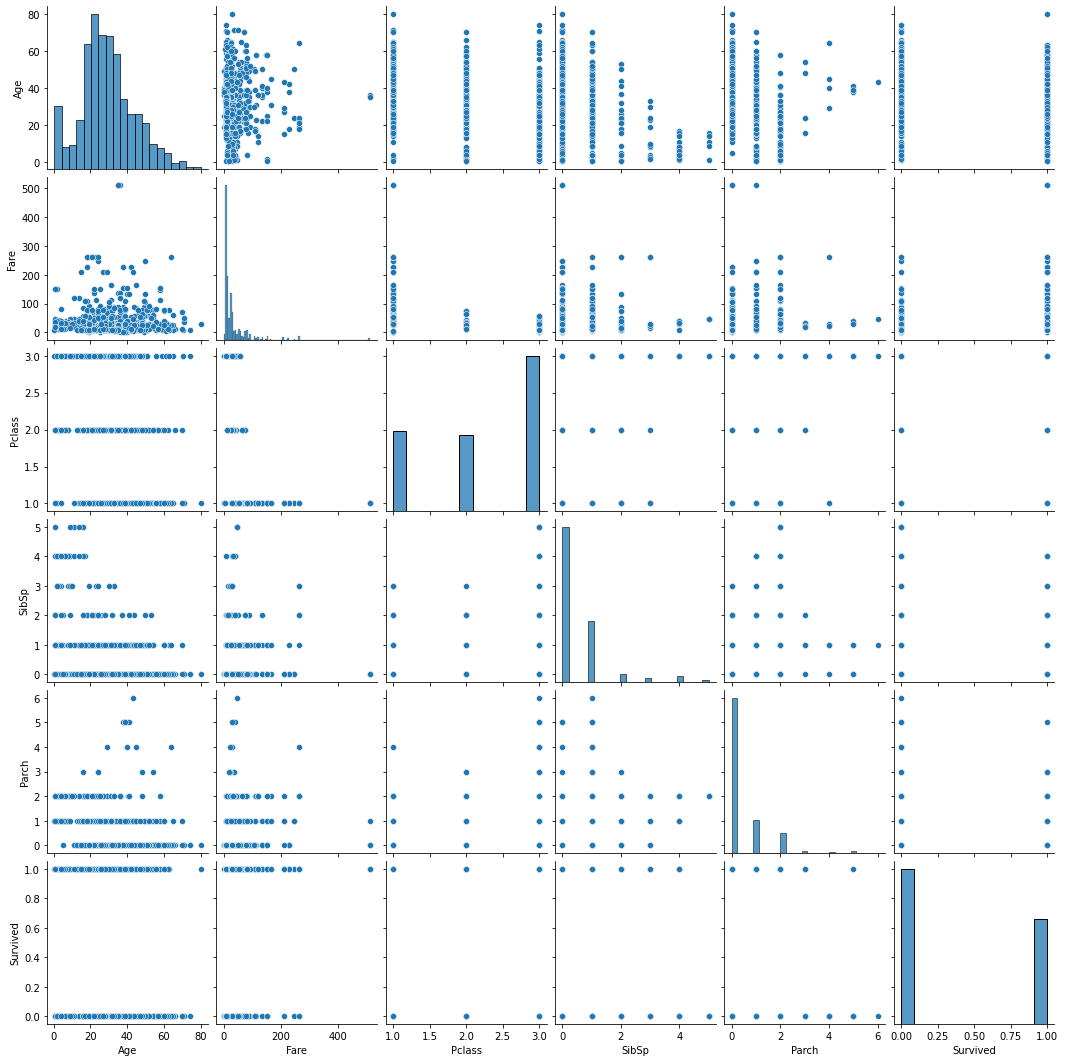

In [10]:
# Ваш код тут
sns.pairplot(train_df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]])


**Як плата за білет (`Fare`) залежить від класу каюти (`Pclass`)? Побудуйте boxplot.**

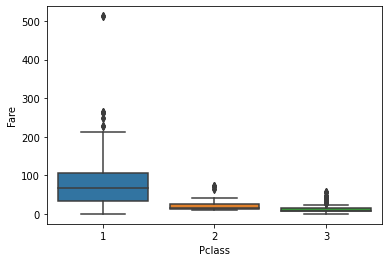

In [11]:
# Ваш код тут
sns.boxplot(data=train_df, x="Pclass", y="Fare")

**Такий boxplot виходить не дуже красивим із-за викидів.** 

**Опціонально: створіть ознаку `Fare_no_out` (вартість без викидів), в якій виключається вартість, що відрізняється від середнього по класу більш ніж на 2 стандартних відхилення. Важливо: потрібно виключити викиди саме в залежності від класу каюти. Інакше виключатися будуть тільки найбільші (1 клас) і малі (3 клас) вартості.**

In [12]:
def exclude_outliers(series):
  return series[(np.abs(stats.zscore(series)) < 3)]

In [13]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = exclude_outliers(fare_pclass1)
fare_pclass2_no_out = exclude_outliers(fare_pclass2)
fare_pclass3_no_out = exclude_outliers(fare_pclass3)
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

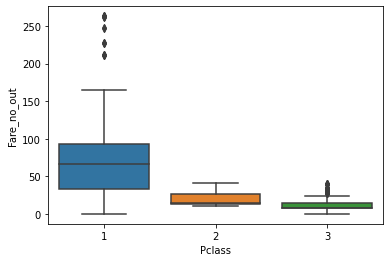

In [14]:
sns.boxplot(data=train_df, x="Pclass", y="Fare_no_out")

**Яке відношення загиблих і виживших в залежності від статі? Відобразіть з допомогою Seaborn.countplot з аргументом hue.**

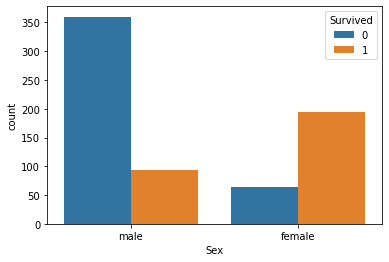

In [15]:
sns.countplot(x="Sex", hue="Survived", data=train_df)

**Яке співідношення загиблих і виживших в залежності від класу каюти? Відобразівть за допомогою Seaborn.countplot з аргументом hue.**

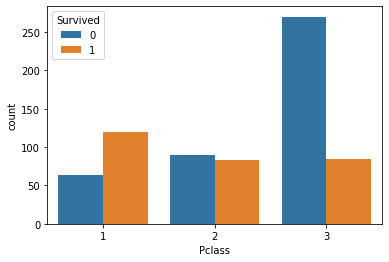

In [16]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)

**Як факт виживання залежить від віку пасажира? Перевірте (графічно) припущення, що молоді частіше виживали. Нехай, умовно, молоді - молодші 30 років, похилого віку – старші 60 років.**

In [ ]:
# Ваш код тут
train_df["Age_level"] = train_df["Age"].map(lambda age: "young" if age <= 30 else 
                                                       ("middle" if age < 60 else "old"))
train_df.head(3)

In [17]:
sns.countplot(x="Age_level", hue="Survived", data=train_df)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_no_out,Age_level
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.2500,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,71.2833,middle
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.9250,young


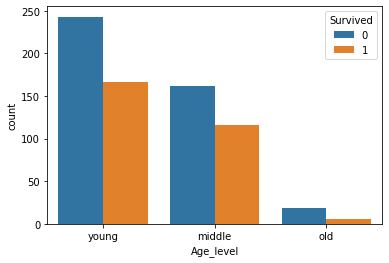

In [18]:
sns.countplot(x="Age_level", hue="Survived", data=train_df)